# <b>背景</b>

<p>ET（essential tremor）患者：原发性震颤(Essential tremor)患者，特发性震颤（essential tremor，ＥＴ）最常见的运动障碍性疾病，主要为手、头部及身体其他部位的姿位性和运动性震颤。发病部位：上肢、头、面部、下颚。</p>
<p>参见文献： louis2003 Factors associated with increased risk of head tremor in essential tremor_ a community-based study in northern Manhattan）。</p>
<p>中线震颤（midline tremor）：   包含：面部（下颌部+唇部）、舌头、声音、头部（又称颈部）和躯干。<p>

    
# <b>目的</b>
1.1.	探索ET患者伴中线震颤的危险因素。
    
1.2.	ET患者伴焦虑和抑郁的危险因素    
    
# <b>任务</b>

探索ET患者伴中线震颤的危险因素：统计推断（独立性检验）面部（下颌部+唇部）、舌头、声音、头部（又称颈部）、躯干，以及焦虑和抑郁 等的关系（合并、伴发情况）


# <b>第一步 引包</b>

In [28]:
#引包：引入所需python包
import xlrd
import os
import re
import pandas as pd
import numpy as np
import itertools
from scipy.stats import chi2_contingency
from sklearn.metrics import roc_curve,auc
import matplotlib as mpl
from matplotlib import pyplot as plt
from numpy import nan
from sklearn import linear_model, datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

# <b>第二步 读取清洗后数据</b>

1）设置默认目录

2）读取csv文件；


In [2]:
dir = "./"
print(os.listdir(dir))

['.ipynb_checkpoints', '1.数据读取和清洗.ipynb', 'data', 'output', '2.中线震颤并发情况.ipynb']


In [47]:
df = pd.read_csv(dir+"output/df_clean.csv",index_col=0) #第一列为行索引
#df = df.drop(columns = df.columns[0]) #删除不需要的列
df.head(2)

,编号,姓名,性别,工作状态合并栏,婚姻状况合并栏,年龄,发病年龄,主要受累部位=2,总病程,上肢病程,...,声音,颈部,面声颈部位分级分数,面声颈量表分数,面声颈有无,声颈量表部位分级,声颈量表分数,声颈有无,下肢震颤,意向性震颤
0,N001,马叔杏,1,1,1,63,59,1,4.0,0.5,...,0,1,1,2,1,1,2,1,1,0
1,N002,方怀琼,0,2,1,64,44,0,20.0,20.0,...,0,0,0,0,0,0,0,0,0,0


# <b>第三步 准备数据 </b>
根据数据分析任务，处理数据

<b> 1) 筛选数据 </b>

筛选与中线震颤、焦虑、抑郁病症等有关字段

In [48]:
#filter 函数 ： 
midline1 = df.filter(items =  ["编号","姓名",'静止性上肢震颤分数','运动性上肢震颤总分','运动性下肢震颤分数','运动性四肢震颤总分','上肢静止性震颤', '下肢静止性震颤', '四肢静止性震颤', '意向性震颤',  '面部', '声音', '颈部','面声颈部位分级分数', '面声颈量表分数','面声颈有无', '声颈量表部位分级', '声颈量表分数', '声颈有无', '下肢震颤', '抑郁分类','焦虑分类'])
midline1.columns

Index(['编号', '姓名', '静止性上肢震颤分数', '运动性上肢震颤总分', '运动性下肢震颤分数', '运动性四肢震颤总分',
       '上肢静止性震颤', '下肢静止性震颤', '四肢静止性震颤', '意向性震颤', '面部', '声音', '颈部', '面声颈部位分级分数',
       '面声颈量表分数', '面声颈有无', '声颈量表部位分级', '声颈量表分数', '声颈有无', '下肢震颤', '抑郁分类',
       '焦虑分类'],
      dtype='object')

<b> 2) 缺失值填补和类型转换 </b>

In [49]:
midline1 = midline1.fillna(0)  #填补缺失值
                
for i in midline1.columns[2:]:   #再次查看值域
    uniquevalue = str(midline1[i].unique())
    print (i,":  ",uniquevalue)

静止性上肢震颤分数 :   [0 2 3 6 1 4]
运动性上肢震颤总分 :   [14 18 28 21 13 25 20 37  6 30 24 22 17 45 27 15 11 29 16 23 12 40 41 10
 32  8 26 19  5  3  7 35 34 42 33  9 31 52  4]
运动性下肢震颤分数 :   [ 2  0  3  6  4  8 12  1]
运动性四肢震颤总分 :   [16 18 31 27 15 29 20 37  9 30 28 22 21 23 25 45 13 12 40 11 49 24 10 32
 44 17 14 26 19  7  3 35 36 46 41 34  6  5 52  8  4 38]
上肢静止性震颤 :   [0. 1.]
下肢静止性震颤 :   [0. 1.]
四肢静止性震颤 :   [0 1]
意向性震颤 :   [0 1]
面部 :   [0 1]
声音 :   [0 1]
颈部 :   [1 0]
面声颈部位分级分数 :   [1 0 2]
面声颈量表分数 :   [2 0 1 3 5 6 4 9]
面声颈有无 :   [1 0]
声颈量表部位分级 :   [1 0 2]
声颈量表分数 :   [2 0 1 3 5 6 4 7]
声颈有无 :   [1 0]
下肢震颤 :   [1 0]
抑郁分类 :   [0 1]
焦虑分类 :   [1 0]


In [50]:
midline1.info() #再次看看类型

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209 entries, 0 to 208
Data columns (total 22 columns):
编号           209 non-null object
姓名           209 non-null object
静止性上肢震颤分数    209 non-null int64
运动性上肢震颤总分    209 non-null int64
运动性下肢震颤分数    209 non-null int64
运动性四肢震颤总分    209 non-null int64
上肢静止性震颤      209 non-null float64
下肢静止性震颤      209 non-null float64
四肢静止性震颤      209 non-null int64
意向性震颤        209 non-null int64
面部           209 non-null int64
声音           209 non-null int64
颈部           209 non-null int64
面声颈部位分级分数    209 non-null int64
面声颈量表分数      209 non-null int64
面声颈有无        209 non-null int64
声颈量表部位分级     209 non-null int64
声颈量表分数       209 non-null int64
声颈有无         209 non-null int64
下肢震颤         209 non-null int64
抑郁分类         209 non-null int64
焦虑分类         209 non-null int64
dtypes: float64(2), int64(18), object(2)
memory usage: 37.6+ KB


In [51]:
midline1 = midline1.astype("str")  #先转成字符型
midline1.iloc[:,2:] = midline1.iloc[:,2:].fillna(0)  #缺失值填补
midline1.iloc[:,2:] = midline1.iloc[:,2:].astype(float).astype(int)
midline1[midline1=="nan"] = 0

<b> 3）衍生新变量 </b>

添加分类标签

--对于列的值域是【0,1】时，分类标签就是该列

--对于列有多个值时，根据该列衍生新列作为分类标签

In [52]:
for i in midline1.columns[2:]:    
    if (list(midline1[i].unique()) not in [[0,1],[1,0]]):
        print (i)
        midline1[i+"有无"] = [(x>0)+0 for x in midline1[i]]

静止性上肢震颤分数
运动性上肢震颤总分
运动性下肢震颤分数
运动性四肢震颤总分
面声颈部位分级分数
面声颈量表分数
声颈量表部位分级
声颈量表分数


In [53]:
midline1.columns

Index(['编号', '姓名', '静止性上肢震颤分数', '运动性上肢震颤总分', '运动性下肢震颤分数', '运动性四肢震颤总分',
       '上肢静止性震颤', '下肢静止性震颤', '四肢静止性震颤', '意向性震颤', '面部', '声音', '颈部', '面声颈部位分级分数',
       '面声颈量表分数', '面声颈有无', '声颈量表部位分级', '声颈量表分数', '声颈有无', '下肢震颤', '抑郁分类',
       '焦虑分类', '静止性上肢震颤分数有无', '运动性上肢震颤总分有无', '运动性下肢震颤分数有无', '运动性四肢震颤总分有无',
       '面声颈部位分级分数有无', '面声颈量表分数有无', '声颈量表部位分级有无', '声颈量表分数有无'],
      dtype='object')

In [54]:
midline1.head(2)

,编号,姓名,静止性上肢震颤分数,运动性上肢震颤总分,运动性下肢震颤分数,运动性四肢震颤总分,上肢静止性震颤,下肢静止性震颤,四肢静止性震颤,意向性震颤,...,抑郁分类,焦虑分类,静止性上肢震颤分数有无,运动性上肢震颤总分有无,运动性下肢震颤分数有无,运动性四肢震颤总分有无,面声颈部位分级分数有无,面声颈量表分数有无,声颈量表部位分级有无,声颈量表分数有无
0,N001,马叔杏,0,14,2,16,0,0,0,0,...,0,1,0,1,1,1,1,1,1,1
1,N002,方怀琼,0,18,0,18,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


# <b> 第四步 独立性检验 </b>

H0：两变量独立；(p>0.05)    H1：两变量有关（p<0.05)

In [56]:
print("频数（中线震颤）的卡方检验  ： \n")
result =pd.DataFrame()
tremors = ['上肢静止性震颤', '下肢静止性震颤', '四肢静止性震颤','运动性上肢震颤总分有无', '运动性下肢震颤分数有无', '运动性四肢震颤总分有无', '下肢震颤','面部', '声音', '颈部','声颈有无',  '面声颈有无', 
            '抑郁分类', '焦虑分类','意向性震颤' ]
for i in itertools.combinations(tremors,2):
    data = pd.crosstab(midline1[i[0]],midline1[i[1]],margins = False)   

    #print (data)
    g, p, dof, expctd = chi2_contingency(data)   #第一个值为卡方值，第二个值为P值，第三个值为自由度，第四个为与原数据数组同维度的对应理论值
    line = [(i[0],i[1],g,p)]
    result = result.append(line)
result.columns = ["col1","col2","卡方值","独立性检验P值"]  #df表适合组合  

result["alpha=0.05独立性检验"] = [x>0.05 for x in result["独立性检验P值"]]
result.head(4)

频数（中线震颤）的卡方检验  ： 



,col1,col2,卡方值,独立性检验P值,alpha=0.05独立性检验
0,上肢静止性震颤,下肢静止性震颤,9.425588,2.139784e-03,False
0,上肢静止性震颤,四肢静止性震颤,198.082345,5.474154e-45,False
0,上肢静止性震颤,运动性上肢震颤总分有无,0.000000,1.000000e+00,True
0,上肢静止性震颤,运动性下肢震颤分数有无,0.005681,9.399194e-01,True


In [57]:
# 对结果进行清洗
result["col2"].replace("有无","",inplace = True)
result["col1"].replace("有无","",inplace = True)
result["col2"].replace("分数","",inplace = True)
result["col2"].replace("总分","",inplace = True)
result["col1"].replace("分数","",inplace = True)
result["col1"].replace("总分","",inplace = True)
result.head(2) 

,col1,col2,卡方值,独立性检验P值,alpha=0.05独立性检验
0,上肢静止性震颤,下肢静止性震颤,9.425588,2.139784e-03,False
0,上肢静止性震颤,四肢静止性震颤,198.082345,5.474154e-45,False


# <b>第五步 可视化 </b>
对统计检验结果，可视化展示有利于了解整体分布情况

<b>1) pvalue的热力图 </b>

颜色越深：p值越大，两类病症越可能独立


In [58]:
pvalue = result.pivot(index="col1",columns = 'col2' , values ='独立性检验P值')  #交叉表适合排列
pvalue = pd.DataFrame(pvalue)
pvalue.columns = pvalue.columns.tolist()
pvalue.index = pvalue.index.tolist()
pvalue = pvalue.filter(items = pvalue.index)
pvalue = pvalue.fillna(0)
pvalue.head(4)

,下肢震颤,下肢静止性震颤,四肢静止性震颤,声音,声颈有无,抑郁分类,焦虑分类,运动性上肢震颤总分有无,运动性下肢震颤分数有无,运动性四肢震颤总分有无,面声颈有无,面部,颈部
上肢静止性震颤,0.939919,0.00214,5.474154e-45,0.788013,0.981556,0.291114,0.454295,1.0,0.939919,1.0,0.872931,0.860934,0.826992
下肢震颤,0.000000,0.00000,0.000000e+00,0.298402,0.079676,0.994536,0.466992,0.0,0.000000,0.0,0.113855,0.896640,0.711781
下肢静止性震颤,0.305456,0.00000,2.139784e-03,0.907275,0.473175,0.647463,0.907275,1.0,0.305456,1.0,0.423448,0.380610,0.697887
四肢静止性震颤,0.939919,0.00000,0.000000e+00,0.788013,0.981556,0.291114,0.454295,1.0,0.939919,1.0,0.872931,0.860934,0.826992


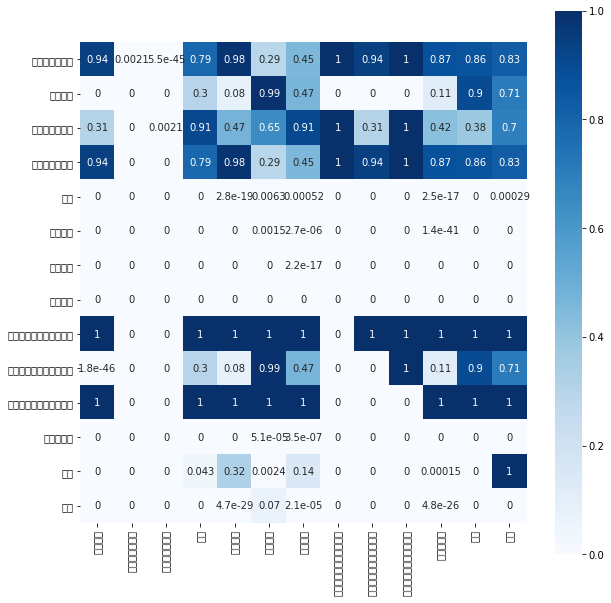

In [59]:
#sns.set(font=myfont.get_family())  
plt.subplots(figsize=(10, 10)) # 设置画面大小
sns.heatmap(pvalue, annot=True, vmax=1, square=True, cmap="Blues")
plt.show()

<b> 2) 推断结果的热力图 </b>

蓝色：接受原假设，两变量独立

白色：不能接受原假设，两变量不独立

In [60]:
pvalue_1 = pvalue
pvalue_1[pvalue_1 >= 0.05] = 1
pvalue_1[pvalue_1 < 0.05] = 0

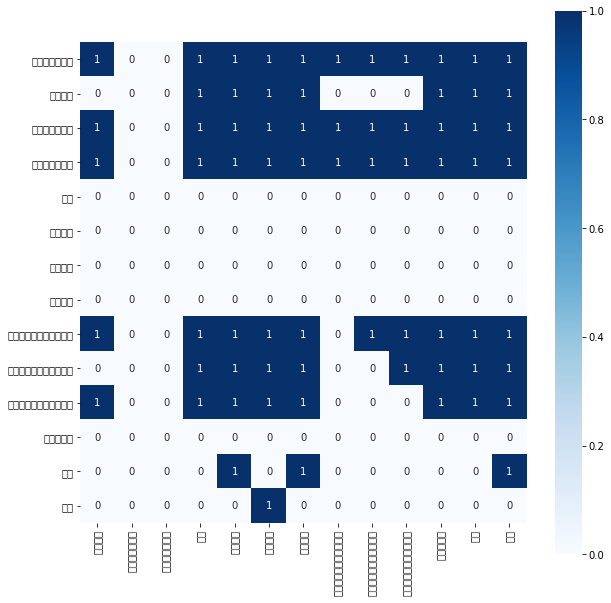

In [61]:
plt.subplots(figsize=(10, 10)) # 设置画面大小
sns.heatmap(pvalue_1, annot=True, vmax=1, square=True, cmap="Blues")
plt.show()

In [62]:
midline1.to_csv(dir+"output/midline1.csv")